<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#简介" data-toc-modified-id="简介-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>简介</a></span></li><li><span><a href="#OpenCV中最常用的特征检测和提取算法" data-toc-modified-id="OpenCV中最常用的特征检测和提取算法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>OpenCV中最常用的特征检测和提取算法</a></span></li><li><span><a href="#特征定义" data-toc-modified-id="特征定义-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>特征定义</a></span></li><li><span><a href="#Harris角点检测" data-toc-modified-id="Harris角点检测-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Harris角点检测</a></span></li><li><span><a href="#SIFT(Scale-Invariant-Feature-Transform)-尺度不变特征变换" data-toc-modified-id="SIFT(Scale-Invariant-Feature-Transform)-尺度不变特征变换-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SIFT(Scale-Invariant Feature Transform) 尺度不变特征变换</a></span></li></ul></div>

## 简介
> OpenCV可以检测图像的主要特征，然后提取这些特征，使其成为图像描述符；这些图像特征可作为图像搜索的数据库。通过单应性(homography)来判断一个图像是否存在于另一个图像中。

## OpenCV中最常用的特征检测和提取算法
> * Harris: 该算法用于检测角点
> * SIFT: 该算法用于检测斑点(blob)
> * SURF: 该算法用于检测斑点
> * FAST: 该算法用于检测角点
> * BRIEF: 该算法用于检测斑点
> * ORB: 该算法代表带方向的`FAST`算法与具有旋转不变性的`BRIEF`算法通过以下方式进行特征匹配：
>> * 暴力(Brute-Force)匹配法
>> * 基于FLANN的匹配法

## 特征定义
> 特征就是有意义的图像区域，该区域具有独特性或易于识别性。因此角点及高密度区域是很好的特征，而大量重复的模式或低密度区域则部署好的特征  

> 边缘可以将图像分成两个区域，因此可以看作好的特征；斑点(与周围有很大差别的图像区域)也是有意义的特征。大多数特征检测算法都会涉及图像的角点，边和斑点的识别

## Harris角点检测

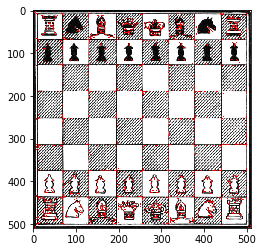

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/chess_board.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
# ksize参数指定了Sobel算子的核(kernel)，Sobel算子通过对图像行，列的变化来检测边缘；
# 该参数定义了角点检测的敏感度，其取值必须介于 3 和 31 之间的奇数
dst = cv2.cornerHarris(gray, 2, 23, 0.04)

# Harris角点检测的结果是一个由角点分数构成的灰度图像。
# 选取适当的阈值对结果图像进行二值化就检测到了图像中的角点
img[dst > 0.01 * dst.max()] = [255, 0, 0]

plt.imshow(img)

## SIFT(Scale-Invariant Feature Transform) 尺度不变特征变换

> SIFT 会对不同的图像尺度(尺度不变特征变换)输出相同的结果

> SIFT 并不检测关键点(关键点由 Difference of Gaussians 检测)，但 SIFT 会通过一个特征向量来描述关键点周围区域的情况

> DoG 是对同一图像使用不同高斯滤波器所得到的结果，DoG操作的最终结果会得到感兴趣的区域(关键点)

> 关键点有如下常用属性：
>> * pt: 表示图像中关键点的 x 坐标和 y 坐标
>> * size: 表示特征的直径
>> * angle: 表示特征的方向
>> * response: 表示关键点的强度
>> * octave: 表示特征所在金字塔的层级

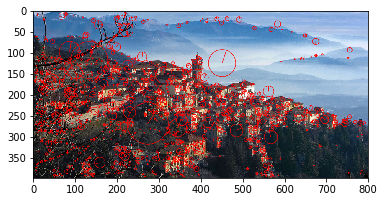

In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/varese.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SIFT对象会使用DoG检测关键点，并且对每个关键点周围的区域计算特征向量
sift = cv2.xfeatures2d.SIFT_create()
# 由方法的名称可知需要执行两个主要操作: 检测 & 计算
# 操作的返回值是关键点信息(关键点)和描述符
keypoints, descriptor = sift.detectAndCompute(gray, None)

# drawKeypoints(image, keypoints, outImage[, color[, flags]]) -> outImage
img = cv2.drawKeypoints(image=img, outImage=img, keypoints=keypoints, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 0, 255))

# matplotlib使用的颜色模式是流行的RGB模式，而opencv使用的是BGR模式，即RGB的倒序模式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## SURF(Speeded-Up Robust Features) 加速稳健特征
> SURF 算法比 SIFT 快好几倍，它吸收了 SIFT 算法的思想

> SURF 采用快速 Hessian 算法检测关键点，而 SURF 会提取特征 (SIFT分别采用DoG和SIFT来检测关键点并提取关键点周围的特征)